In [2]:
import pandas as pd
df = (pd.read_csv(r"E:\DataScience\FinalBalancedDataset.csv"))
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [10]:
df['Toxicity'].value_counts()

Toxicity
0    32592
1    24153
Name: count, dtype: int64

In [11]:
df.isna().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [13]:
#Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from textblob import TextBlob
stop_words= set(stopwords.words('english'))
#function to clean the given tweets with NP processes- Tokenisation, Stemming and Lemmatization
def clean_text(texts):
    clean_texts = []
    for text in texts:
        text = text.lower()
        tokens = word_tokenize(text)
        cleaned_tokens = []
        lemmatizer = WordNetLemmatizer()
        for word in tokens:
            if (word.isalnum()) and (not word.isdigit()) and (word not in stop_words):
                word = word.strip(string.punctuation)
                word = lemmatizer.lemmatize(word)
                word = word.strip()
                cleaned_tokens.append(word)
            cleaned_text = " ".join(cleaned_tokens)
        clean_texts.append(cleaned_text)
    return clean_texts

#function to find the sentiments using TextBlob
def get_sentiment(texts):
    sentiments = []
    polarity = []
    subjectivity = []
    for text in texts:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity>0:
            sentiments.append("Positive")
            polarity.append(analysis.sentiment.polarity)
            subjectivity.append(analysis.sentiment.subjectivity)
        #elif analysis.sentiment.polarity<0:
        else:
            sentiments.append("Negative")
            polarity.append(analysis.sentiment.polarity)
            subjectivity.append(analysis.sentiment.subjectivity)
    return sentiments,polarity,subjectivity
           
#Reading the downloaded toxic tweets dataset and writing into a Pandas Dataframe
df = (pd.read_csv(r"E:\DataScience\FinalBalancedDataset.csv")).head(1000)
#Executing the above two functions on the given dataset
df['cleaned_text'] = clean_text(df['tweet'].values)
df['sentiment'] = get_sentiment(df['cleaned_text'].values)[0]
df['polarity'] =  get_sentiment(df['cleaned_text'].values)[1]
df['subjectivity'] = get_sentiment(df['cleaned_text'].values)[2]
df


,Unnamed: 0,Toxicity,tweet,cleaned_text,sentiment,polarity,subjectivity
0,0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...,Negative,-0.300000,0.535417
1,1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit ca use cause offe...,Positive,0.200000,0.200000
2,2,0,bihday your majesty,bihday majesty,Negative,0.000000,0.000000
3,3,0,#model i love u take with u all the time in ...,model love u take u time,Positive,0.500000,0.600000
4,4,0,factsguide: society now #motivation,factsguide society motivation,Negative,0.000000,0.000000
...,...,...,...,...,...,...,...
995,995,0,are you really or just pretending to be? #t...,really pretending truthseekers empowerment sel...,Positive,0.200000,0.200000
996,996,0,i finally found a way how to delete old tweets...,finally found way delete old tweet might find ...,Positive,0.133333,0.400000
997,997,0,@user what a #view #oregon #poland #usa #un...,user view oregon poland usa unitedstates holid...,Negative,0.000000,0.000000
998,998,0,"have you put in your #vote yet? if you havent,...",put vote yet havent share see make smile poll,Positive,0.300000,0.100000


In [15]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
model=TfidfVectorizer()
df1=pd.DataFrame(model.fit_transform(df['cleaned_text']).toarray())
df1.index=(df['cleaned_text'])
df1

,0,1,2,3,4,5,6,7,8,9,...,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437
cleaned_text,,,,,,,,,,,,,,,,,,,,,
user father dysfunctional selfish drag kid dysfunction run,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user user thanks lyft credit ca use cause offer wheelchair van pdx disapointed getthanked,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bihday majesty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
model love u take u time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
factsguide society motivation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
really pretending truthseekers empowerment selfimprovement healing ihearadio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
finally found way delete old tweet might find useful well deletetweets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user view oregon poland usa unitedstates holiday dj producer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Training the ML models
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
stop_words=set(stopwords.words('english'))
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
def clean_text(texts):
    
    clean_texts=[]
    for text in texts:
        text=text.lower()
        tokens=word_tokenize(text)
        cleaned_tokens=[]
        lemmatizer=WordNetLemmatizer()
        for word in tokens:
            if word.isalnum() and (not word.isdigit()) and (word not in stop_words):
                word=word.strip(string.punctuation)
                word=lemmatizer.lemmatize(word)
                cleaned_tokens.append(word)
            cleaned_text=" ".join(cleaned_tokens)
        clean_texts.append(cleaned_text)
    return clean_texts
df=pd.read_csv(r"E:\DataScience\FinalBalancedDataset.csv")
df=df.tail(1000)
corpus=clean_text(df['tweet'].values)
model=TfidfVectorizer()
data=pd.DataFrame(model.fit_transform(corpus).toarray())
data.columns=model.get_feature_names_out()
data.index=corpus
data['target']=df['Toxicity']
X=data.drop(['target'],axis=1)

y=df['Toxicity']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print(X)
print(y)


                                                    11wdnick  13th  13yr  1st  \
drake need make mind rapper bitch haha                   0.0   0.0   0.0  0.0   
draymond green bitch as nigga bruh                       0.0   0.0   0.0  0.0   
drop day early fuck nigga need hear ed1 hard tr...       0.0   0.0   0.0  0.0   
dumb ugly stupid bullshit as bitch                       0.0   0.0   0.0  0.0   
eagle fucking cunt http                                  0.0   0.0   0.0  0.0   
...                                                      ...   ...   ...  ...   
muthaf lie lifeasking right tl trash mine bible...       0.0   0.0   0.0  0.0   
gone broke wrong heart baby drove redneck crazy          0.0   0.0   0.0  0.0   
young buck wan na eat dat nigguh like aint fuck...       0.0   0.0   0.0  0.0   
youu got wild bitch tellin lie                           0.0   0.0   0.0  0.0   
ntac eileen dahlia beautiful color combination ...       0.0   0.0   0.0  0.0   

                           

In [ ]:
#When ``true positive + false positive == 0``, precision is undefined.   
#When ``true positive + false negative == 0``, recall is undefined.  
#In such cases, by default the metric will be set to 0, as will f-score,
#and ``UndefinedMetricWarning`` will be raised. 
#This behavior can be   modified with ``zero_division``.


classification_report:
               precision    recall  f1-score   support

           0       0.29      0.11      0.15        19
           1       0.91      0.97      0.94       181

    accuracy                           0.89       200
   macro avg       0.60      0.54      0.55       200
weighted avg       0.85      0.89      0.87       200

precision_score_train: 1.0
recall_score_train: 0.9971988795518207
f1_score_train: 0.9985974754558204
precision_score_test: 0.9119170984455959
recall_score_test: 0.9723756906077348
f1_score_test: 0.9411764705882353

Confusion matrix
 [[  2  17]
 [  5 176]]


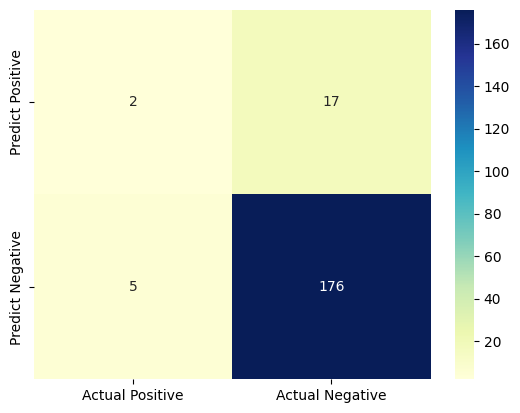

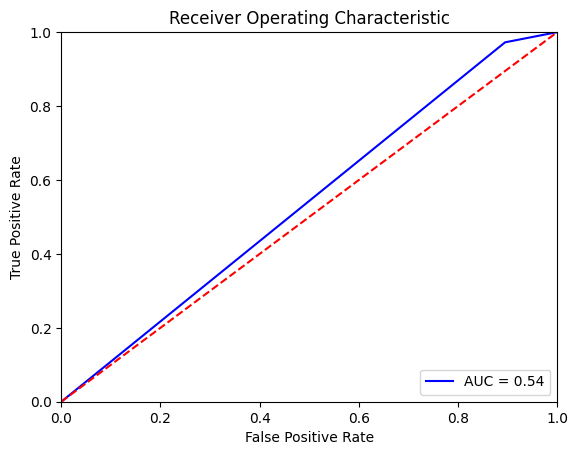

In [31]:
#Naive Bayes
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

print("\nclassification_report:\n", classification_report(y_test, y_pred_test))


print(f"precision_score_train: {precision_score(y_train,y_pred_train)}")
print(f"recall_score_train: {recall_score(y_train,y_pred_train)}")
print(f"f1_score_train: {f1_score(y_train,y_pred_train)}")


print(f"precision_score_test: {precision_score(y_test,y_pred_test)}")
print(f"recall_score_test: {recall_score(y_test,y_pred_test)}")
print(f"f1_score_test: {f1_score(y_test,y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = gnb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.91      1.00      0.95       181

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

precision_score_train: 0.9916666666666667
recall_score_train: 1.0
f1_score_train: 0.99581589958159
precision_score_test: 0.905
recall_score_test: 1.0
f1_score_test: 0.9501312335958005

Confusion matrix for SVC 
 [[  0  19]
 [  0 181]]


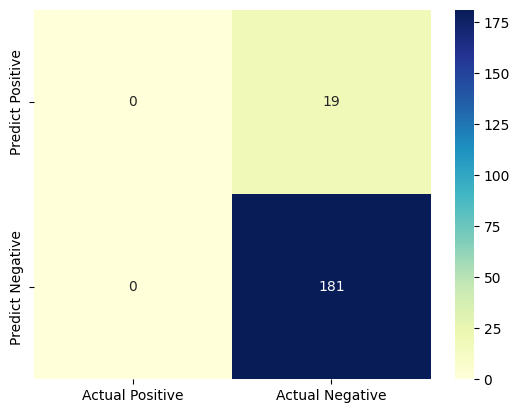

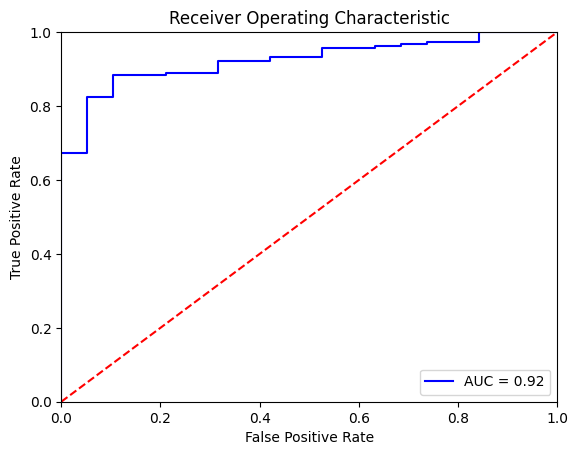

In [30]:
#SVC(Support Vector Classification)

model=SVC(probability=True)
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("\nclassification_report:\n", classification_report(y_test, y_pred_test))

print(f"precision_score_train: {precision_score(y_train,y_pred_train)}")
print(f"recall_score_train: {recall_score(y_train,y_pred_train)}")
print(f"f1_score_train: {f1_score(y_train,y_pred_train)}")


print(f"precision_score_test: {precision_score(y_test,y_pred_test)}")
print(f"recall_score_test: {recall_score(y_test,y_pred_test)}")
print(f"f1_score_test: {f1_score(y_test,y_pred_test)}")

cm = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for SVC \n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



classification_report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.91      1.00      0.95       181

    accuracy                           0.91       200
   macro avg       0.95      0.53      0.53       200
weighted avg       0.92      0.91      0.87       200

precision_score_train: 0.9138817480719794
recall_score_train: 0.9957983193277311
f1_score_train: 0.953083109919571
precision_score_test: 0.9095477386934674
recall_score_test: 1.0
f1_score_test: 0.9526315789473684

Confusion matrix for KNeighborsClassifier
 [[  1  18]
 [  0 181]]


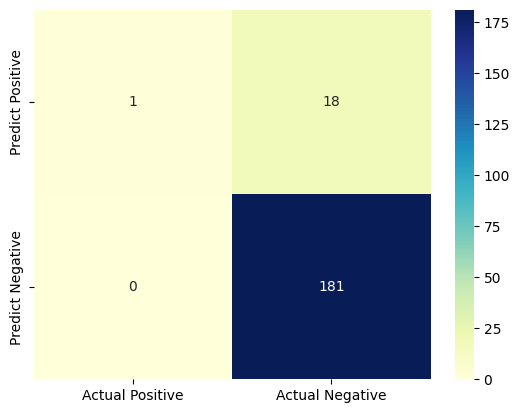

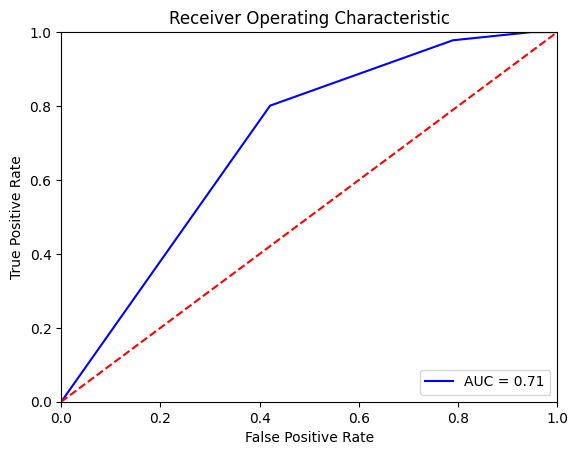

In [29]:
#KNeighbours Classification

model=KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("\nclassification_report:\n", classification_report(y_test, y_pred_test))

print(f"precision_score_train: {precision_score(y_train,y_pred_train)}")
print(f"recall_score_train: {recall_score(y_train,y_pred_train)}")
print(f"f1_score_train: {f1_score(y_train,y_pred_train)}")

print(f"precision_score_test: {precision_score(y_test,y_pred_test)}")
print(f"recall_score_test: {recall_score(y_test,y_pred_test)}")
print(f"f1_score_test: {f1_score(y_test,y_pred_test)}")

cm = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for KNeighborsClassifier\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



classification_report:
               precision    recall  f1-score   support

           0       0.43      0.32      0.36        19
           1       0.93      0.96      0.94       181

    accuracy                           0.90       200
   macro avg       0.68      0.64      0.65       200
weighted avg       0.88      0.90      0.89       200

precision_score_train: 1.0
recall_score_train: 1.0
f1_score_train: 1.0
precision_score_test: 0.9301075268817204
recall_score_test: 0.9558011049723757
f1_score_test: 0.9427792915531336

Confusion matrix for DecisionTreeClassifier
 [[  6  13]
 [  8 173]]


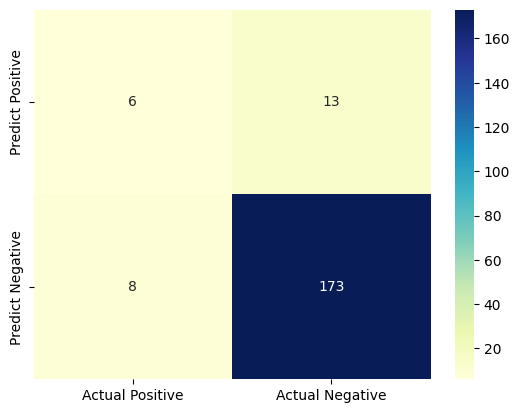

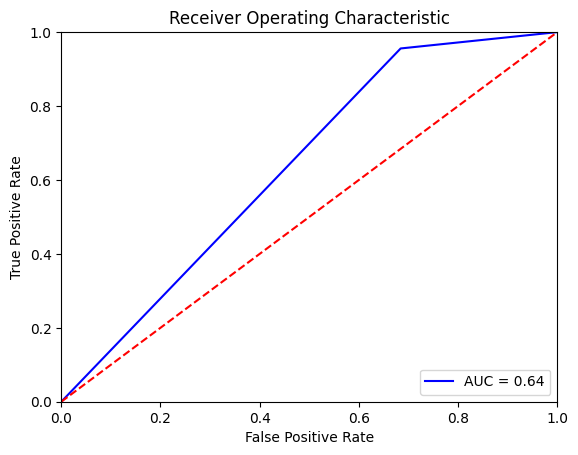

In [28]:
#DecisionTreeClassifier(),

model=DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("\nclassification_report:\n", classification_report(y_test, y_pred_test))

print(f"precision_score_train: {precision_score(y_train,y_pred_train)}")
print(f"recall_score_train: {recall_score(y_train,y_pred_train)}")
print(f"f1_score_train: {f1_score(y_train,y_pred_train)}")


print(f"precision_score_test: {precision_score(y_test,y_pred_test)}")
print(f"recall_score_test: {recall_score(y_test,y_pred_test)}")
print(f"f1_score_test: {f1_score(y_test,y_pred_test)}")

cm = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for DecisionTreeClassifier\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.91      1.00      0.95       181

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

precision_score_train: 1.0
recall_score_train: 1.0
f1_score_train: 1.0
precision_score_test: 0.905
recall_score_test: 1.0
f1_score_test: 0.9501312335958005
Confusion matrix for RandomForestClassifier
 [[  0  19]
 [  0 181]]


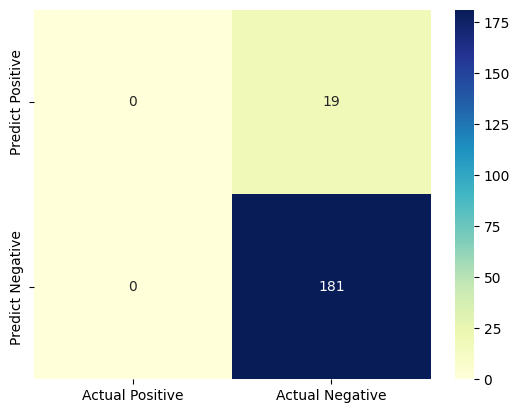

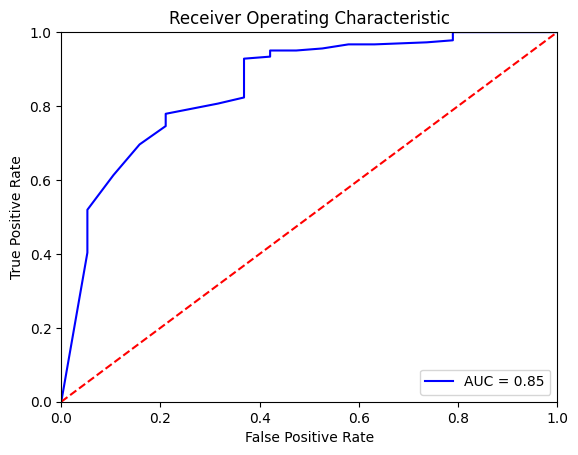

In [27]:
#RandomForest Classification
model=RandomForestClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


print("\nclassification_report:\n", classification_report(y_test, y_pred_test))


print(f"precision_score_train: {precision_score(y_train,y_pred_train)}")
print(f"recall_score_train: {recall_score(y_train,y_pred_train)}")
print(f"f1_score_train: {f1_score(y_train,y_pred_train)}")

print(f"precision_score_test: {precision_score(y_test,y_pred_test)}")
print(f"recall_score_test: {recall_score(y_test,y_pred_test)}")
print(f"f1_score_test: {f1_score(y_test,y_pred_test)}")

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for RandomForestClassifier\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()